Import Library

In [141]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [142]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
import matplotlib.pyplot as plt

### NOTE
-> pake command di bawah cuy buat install librarynya dlu klo mau run


```
pip install scikit-fuzzy
```



## Define Parameter Fuzzy
1. Curah Hujan
2. Suhu / Temperatur
3. Kecepatan angin (m/s)
4. Kelembaban Udara

##Output Parameter
1. Kebakaran Chance

In [143]:
curah_hujan = ctrl.Antecedent(np.arange(0, 1001, 1), 'Curah Hujan')
temperatur = ctrl.Antecedent(np.arange(0, 41, 1), 'Temperatur')
kecepatan_angin = ctrl.Antecedent(np.arange(0, 35, 1), 'Kecepatan Angin')
kelembaban = ctrl.Antecedent(np.arange(0, 71, 1), 'Kelembaban')
out_chance = ctrl.Consequent(np.arange(0, 101, 1), 'Chance Kebakaran')

In [144]:
curah_hujan['rendah'] = fuzz.trimf(curah_hujan.universe, [0 , 50 , 100])
curah_hujan['menengah'] = fuzz.trimf(curah_hujan.universe, [100 , 200 , 300])
curah_hujan['tinggi'] = fuzz.trimf(curah_hujan.universe, [300 , 400 , 500])
curah_hujan['sangat tinggi'] = fuzz.trimf(curah_hujan.universe, [500, 750, 1000])

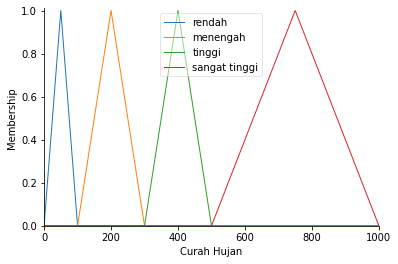

In [145]:
curah_hujan.view()

In [146]:
temperatur['rendah'] = fuzz.trimf(temperatur.universe, [0 , 7.5 , 15])
temperatur['normal'] = fuzz.trimf(temperatur.universe, [11 , 18.5 , 26])
temperatur['panas'] = fuzz.trimf(temperatur.universe, [22 , 31 , 40])

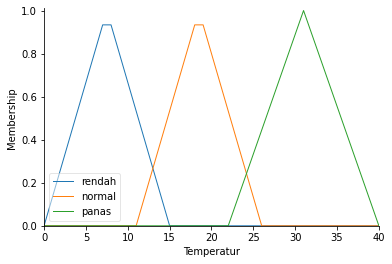

In [147]:
temperatur.view()

In [148]:
kecepatan_angin['pelan'] = fuzz.trimf(kecepatan_angin.universe, [0 , 2.7 , 5.4])
kecepatan_angin['sedang'] = fuzz.trimf(kecepatan_angin.universe, [5.5 , 9.65 , 13.8])
kecepatan_angin['kencang'] = fuzz.trimf(kecepatan_angin.universe, [13.9 , 19.15 , 24.4])
kecepatan_angin['sangat kencang'] = fuzz.trimf(kecepatan_angin.universe, [24.5 , 29.75 , 35])

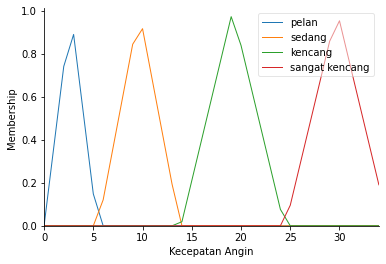

In [149]:
kecepatan_angin.view()

In [150]:
kelembaban['dry'] = fuzz.trimf(kelembaban.universe, [0 , 10 , 20])
kelembaban['moist'] = fuzz.trimf(kelembaban.universe, [15 , 32.5 , 50])
kelembaban['wet'] = fuzz.trimf(kelembaban.universe, [40 , 55 , 70])

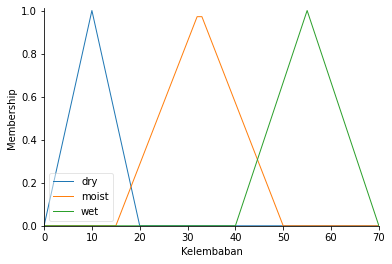

In [151]:
kelembaban.view()

In [152]:
out_chance['low'] = fuzz.trimf(out_chance.universe, [0 , 16.65 , 33.3])
out_chance['medium'] = fuzz.trimf(out_chance.universe, [33.3 , 49.95 , 66.6])
out_chance['high'] = fuzz.trimf(out_chance.universe, [66.6 , 83.3 , 100])

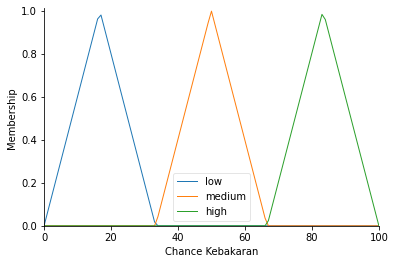

In [153]:
out_chance.view()

#Define Rules

In [154]:
rule1 = ctrl.Rule(curah_hujan['rendah'] & temperatur['panas'] & kecepatan_angin['kencang'] & kelembaban['dry'], out_chance['high'])
rule2 = ctrl.Rule(curah_hujan['rendah'] & temperatur['normal'] & kecepatan_angin['kencang'] & kelembaban['dry'], out_chance['high'])
rule3 = ctrl.Rule(curah_hujan['tinggi'] & temperatur['normal'] & kecepatan_angin['kencang'] & kelembaban['dry'], out_chance['medium'])
rule4 = ctrl.Rule(curah_hujan['sangat tinggi'] & temperatur['panas'] & kecepatan_angin['kencang'] & kelembaban['dry'], out_chance['medium'])

In [155]:
chance_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4])

In [156]:
kebakaran = ctrl.ControlSystemSimulation(chance_ctrl)

[83.2807914195283, 49.952556858228554, 83.28440662506593, 49.952556858228554, 49.952556858228554, 83.2807914195283, 49.952556858228554]
[1, 2, 3, 4, 5, 6, 7]
[83.28, 49.95, 83.28, 49.95, 49.95, 83.28, 49.95]


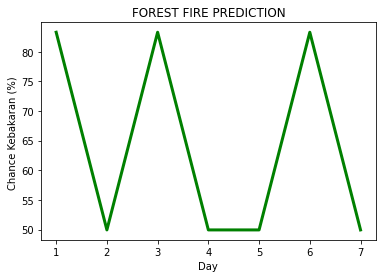

In [171]:
input = [
    {
        'day': 1,
        'Curah Hujan': 40 ,
        'Temperatur': 25,
        'Kecepatan Angin': 15,
        'Kelembaban': 7,
    },
    {
        'day': 2,
        'Curah Hujan': 550 ,
        'Temperatur': 28,
        'Kecepatan Angin': 18,
        'Kelembaban': 18,
    },
    {
        'day': 3,
        'Curah Hujan': 75 ,
        'Temperatur': 30,
        'Kecepatan Angin': 23,
        'Kelembaban': 12,
    },
    {
        'day': 4,
        'Curah Hujan': 550 ,
        'Temperatur': 28,
        'Kecepatan Angin': 18,
        'Kelembaban': 18,
    },
    {
        'day': 5,
        'Curah Hujan': 550 ,
        'Temperatur': 28,
        'Kecepatan Angin': 18,
        'Kelembaban': 18,
    },
    {
        'day': 6,
        'Curah Hujan': 40 ,
        'Temperatur': 25,
        'Kecepatan Angin': 15,
        'Kelembaban': 7,
    },
    {
        'day': 7,
        'Curah Hujan': 550 ,
        'Temperatur': 28,
        'Kecepatan Angin': 18,
        'Kelembaban': 18,
    },

    
]

#Function for Looping Fuzzy
dict = {}
def get_chance(input):
    for i in input:
        kebakaran.input['Curah Hujan'] = i['Curah Hujan']
        kebakaran.input['Temperatur'] = i['Temperatur']
        kebakaran.input['Kecepatan Angin'] = i['Kecepatan Angin']
        kebakaran.input['Kelembaban'] = i['Kelembaban']
        kebakaran.compute()

        dict[i['day']] = kebakaran.output['Chance Kebakaran']
    return dict
    
get_chance(input)

def show_graph(dict):
    # x label is day
    # y label is chance (0 - 100%)
    x = list(dict.keys())
    y = list(dict.values())
    print (y)

    #round the value of y to 2 decimal
    y = [round(i,2) for i in y]

    #print buat debug / cek output sementara
    print (x)
    print (y)

    plt.plot(x, y, color='green', linewidth = 3)
    plt.title('FOREST FIRE PREDICTION')
    plt.xlabel('Day')
    plt.ylabel('Chance Kebakaran (%) ')

show_graph(dict)
